In [1]:
import pandas as pd

df = pd.read_csv('../data/benin-malanville.csv')  
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [2]:
# Summary statistics for all numeric columns
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [3]:
# Check how many missing values each column has
df.isna().sum().sort_values(ascending=False)

Comments         525600
WSstdev               0
TModB                 0
TModA                 0
Precipitation         0
Cleaning              0
BP                    0
WDstdev               0
WD                    0
Timestamp             0
GHI                   0
WS                    0
RH                    0
Tamb                  0
ModB                  0
ModA                  0
DHI                   0
DNI                   0
WSgust                0
dtype: int64

In [4]:
# Flag columns with more than 5% missing values
threshold = 0.05 * len(df)
missing_cols = df.columns[df.isna().sum() > threshold]
missing_cols

Index(['Comments'], dtype='object')

In [5]:
# Drop the Comments column
df = df.drop(columns=['Comments'])

In [6]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3


In [5]:
# View data types of all columns
df.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

In [6]:
# Check unique values in non-numeric columns
df.select_dtypes(include='object').nunique()

Timestamp    525600
dtype: int64

In [8]:
# Check unique values in numeric columns
df.select_dtypes(include='number').nunique().sort_values(ascending=False)

ModA             10755
DNI               8905
GHI               8609
ModB              8461
DHI               6995
WD                3601
RH                 980
TModA              712
WDstdev            679
TModB              642
Tamb               329
WS                 164
WSgust              92
WSstdev             42
Precipitation       26
BP                  19
Cleaning             2
Comments             0
dtype: int64

Matplotlib is building the font cache; this may take a moment.


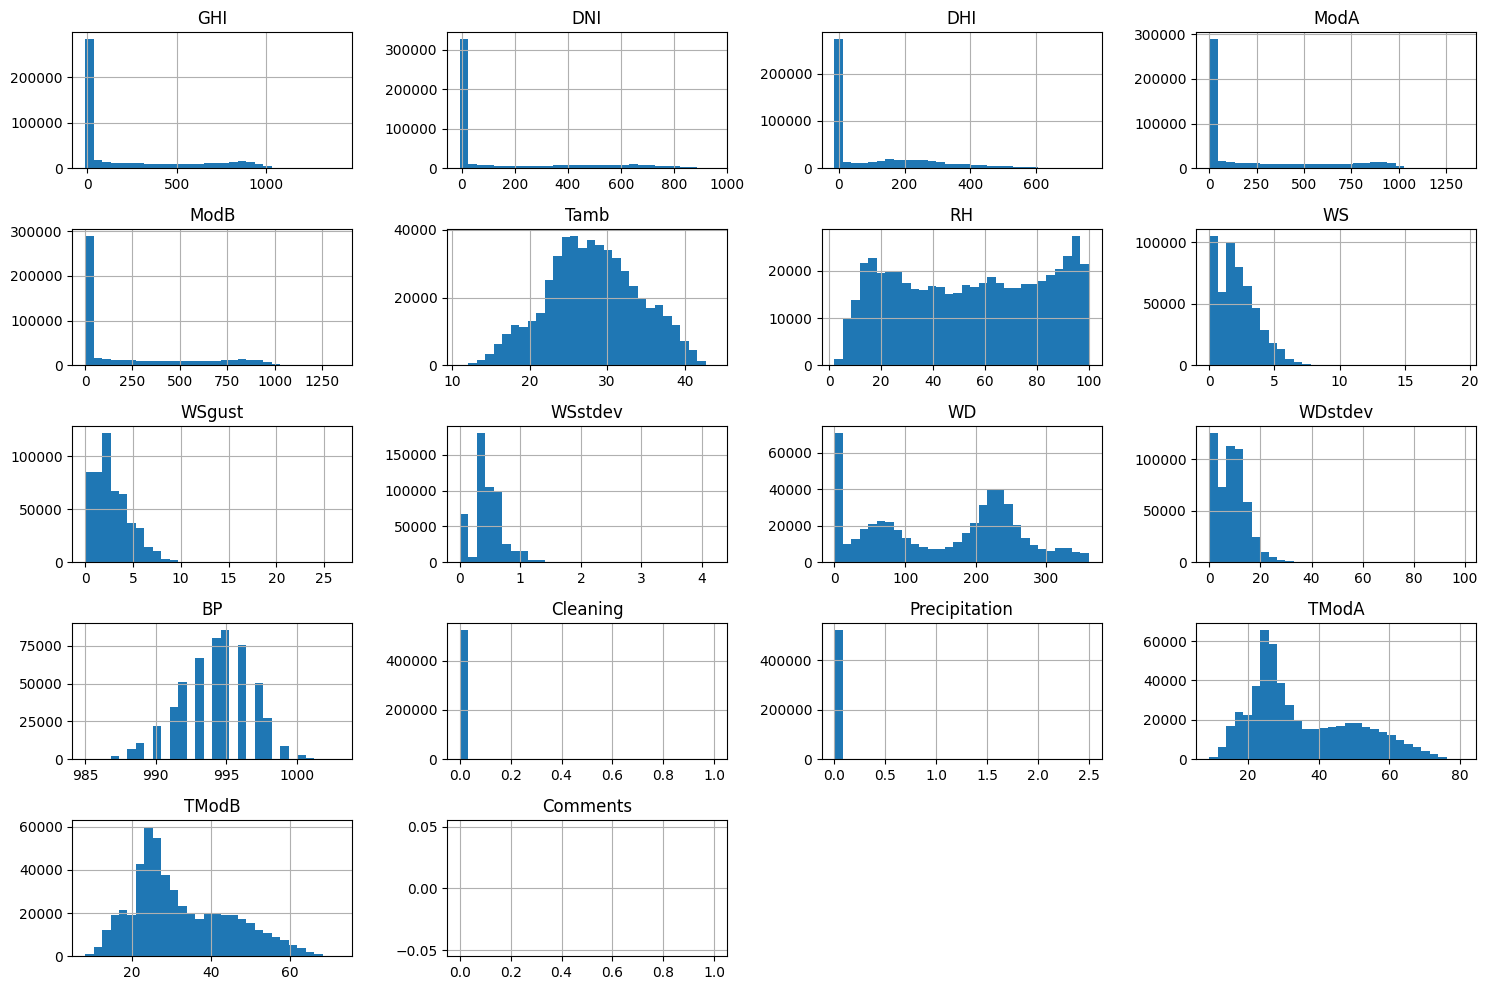

In [7]:
import matplotlib.pyplot as plt

# Automatically detect all numeric columns and plot them
df.select_dtypes(include='number').hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [11]:
# Distribution of categorical features
for col in df.select_dtypes(include='object').columns:
    print(f"\nValue counts for '{col}':\n")
    print(df[col].value_counts())


Value counts for 'Timestamp':

Timestamp
2021-08-09 00:01    1
2022-04-09 06:36    1
2022-04-09 08:10    1
2022-04-09 08:09    1
2022-04-09 08:08    1
                   ..
2021-12-08 15:55    1
2021-12-08 15:54    1
2021-12-08 15:53    1
2021-12-08 15:52    1
2022-08-09 00:00    1
Name: count, Length: 525600, dtype: int64


In [8]:
# Columns for which to detect outliers
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-score manually and filter out rows where abs(Z) > 3
df_cleaned = df.copy()

for col in cols:
    mean = df_cleaned[col].mean()
    std = df_cleaned[col].std()
    df_cleaned = df_cleaned[df_cleaned[col].apply(lambda x: abs((x - mean) / std) <= 3)]

# Drop rows with missing values in key columns
df_cleaned = df_cleaned.dropna(subset=cols)

# Save cleaned version
df_cleaned.to_csv('../data/benin_clean.csv', index=False)
